# Gestión de carteras

# Importamos librerias

In [ ]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Definimos las características de los gráficos

In [ ]:
sns.set_style("whitegrid")

## Recuperamos precios y calculamos rentabilidades

Tienes que autorizar a google colab para tener acceso a tu google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename='tr_eikon_eod_data.csv'
raw = pd.read_csv(filename,index_col=0, parse_dates=True).dropna()
print(raw)

                AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX  \
Date                                                                       
2010-01-04   30.572827  30.950   20.88   133.90  173.08  113.33  1132.99   
2010-01-05   30.625684  30.960   20.87   134.69  176.14  113.63  1136.52   
2010-01-06   30.138541  30.770   20.80   132.25  174.26  113.71  1137.14   
2010-01-07   30.082827  30.452   20.60   130.00  177.67  114.19  1141.69   
2010-01-08   30.282827  30.660   20.83   133.52  174.31  114.57  1144.98   
...                ...     ...     ...      ...     ...     ...      ...   
2018-06-25  182.170000  98.390   50.71  1663.15  221.54  271.00  2717.07   
2018-06-26  184.430000  99.080   49.67  1691.09  221.58  271.60  2723.06   
2018-06-27  184.160000  97.540   48.76  1660.51  220.18  269.35  2699.63   
2018-06-28  185.500000  98.630   49.25  1701.45  223.42  270.89  2716.31   
2018-06-29  185.110000  98.610   49.71  1699.80  220.57  271.28  2718.37   

           

In [ ]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']
data = pd.DataFrame(raw[symbols]).dropna()
print(data)

               SPY     GLD      AAPL.O  MSFT.O
Date                                          
2010-01-04  113.33  109.80   30.572827  30.950
2010-01-05  113.63  109.70   30.625684  30.960
2010-01-06  113.71  111.51   30.138541  30.770
2010-01-07  114.19  110.82   30.082827  30.452
2010-01-08  114.57  111.37   30.282827  30.660
...            ...     ...         ...     ...
2018-06-25  271.00  119.89  182.170000  98.390
2018-06-26  271.60  119.26  184.430000  99.080
2018-06-27  269.35  118.58  184.160000  97.540
2018-06-28  270.89  118.22  185.500000  98.630
2018-06-29  271.28  118.65  185.110000  98.610

[2138 rows x 4 columns]


Voy a crear un índice. Divido los precios actuales con los del momento inicial `data.iloc[0]`

<Axes: xlabel='Date'>

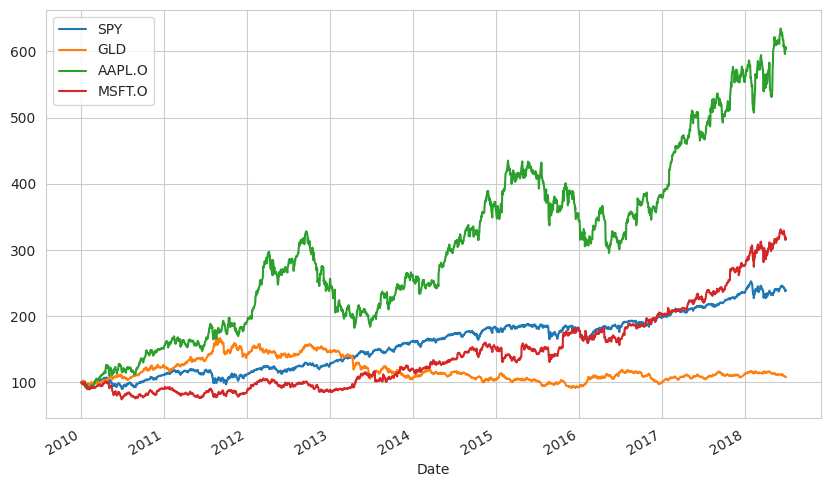

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

Vamos a calcular las rentabilidades logarítmicas y posteriormente representar sus histogramas.

bins=50: Este argumento determina la cantidad de "contenedores" o "bins" en los que se agruparán las rentabilidades para crear el histograma. En otras palabras, especifica cuántos intervalos diferentes se utilizarán para dividir el rango de rentabilidades observadas. En tu caso, se han elegido 50 bins, lo que significa que se dividirá el rango total de rentabilidades en 50 intervalos. Un valor más alto de bins proporcionaría un histograma más detallado con más barras, mientras que un valor más bajo de bins daría un histograma más suavizado con menos barras. La elección del número adecuado de bins depende de la distribución de tus datos y de tus preferencias visuales.

figsize=(10, 8): Este argumento controla el tamaño de la figura en la que se muestra el histograma. Es una tupla que especifica el ancho y el alto de la figura en pulgadas. En este caso, la figura tendrá un ancho de 10 pulgadas y una altura de 8 pulgadas. Ajustar el tamaño de la figura puede ser útil para controlar la legibilidad y la presentación del histograma en tu entorno de trabajo. Puedes cambiar estos valores según tus necesidades para obtener una figura que se ajuste mejor a tu diseño.

In [ ]:
rets = np.log(data / data.shift(1)).dropna()
rets

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807
2010-01-11,0.001396,0.013202,-0.008861,-0.012802
...,...,...,...,...
2018-06-25,-0.013706,-0.003746,-0.014983,-0.020323
2018-06-26,0.002212,-0.005269,0.012330,0.006988
2018-06-27,-0.008319,-0.005718,-0.001465,-0.015665


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

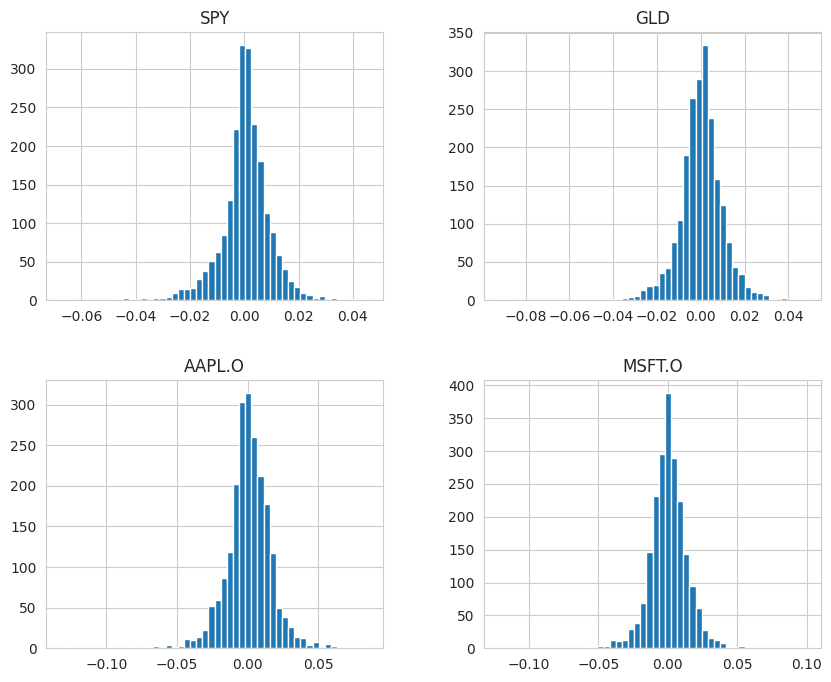

In [ ]:
rets.hist(bins=50, figsize=(10, 8))

# Creamos una cartera equiponderada con cuatro activos

In [ ]:
noa = len(symbols) # contamos el número de activos
print('Número de activos', noa)

Número de activos 4


In [ ]:
# Creamos una cartera equiponderada
weights = np.array(noa * [1. / noa,])
weights


array([0.25, 0.25, 0.25, 0.25])

In [ ]:
mean=rets.mean()
mean

,0
SPY,0.000408
GLD,0.000036
AAPL.O,0.000843
MSFT.O,0.000542


Los datos están expresados en términos diarios. Consideramos que durante 252 días al año tenemos actividad en los mercados financieros

In [ ]:
ret_port=rets.mean()* 252 @ weights.T
print(f"La rentabilidad esperada de la cartera equiponderada:{ret_port:.4f}")

La rentabilidad esperada de la cartera equiponderada:0.1153


In [ ]:
cov=rets.cov()
cov

,SPY,GLD,AAPL.O,MSFT.O
SPY,8.705878e-05,2.470088e-07,0.000083,0.000088
GLD,2.470088e-07,1.040027e-04,0.000006,-0.000001
AAPL.O,8.348619e-05,6.002633e-06,0.000253,0.000093
MSFT.O,8.826834e-05,-1.376963e-06,0.000093,0.000202


In [ ]:
sigma_port=np.sqrt(weights @ cov*252 @ weights.T)
print(f"La volatilidad de la cartera equiponderada:{sigma_port:.4f}")

NameError: name 'weights' is not defined

## Creamos una cartera aleatoria con cuatro títulos

Utilizamos `np.random.random(noa)`para generar 4 números aleatorios que nos ayudarán a generar una cartera aleatoria. Lamentablemente no sumarán uno por lo que los divideremos por la suma de los cuatro dígitos.

In [ ]:
# Fijar semilla para reproducibilidad
np.random.seed(42)  # Puedes usar cualquier número entero

pesos = np.random.random(noa)
print(pesos)

[0.37454012 0.95071431 0.73199394 0.59865848]


In [ ]:
pesos /= np.sum(pesos)
print(pesos)

[0.14102156 0.35796222 0.27560979 0.22540643]


Calculamos su rentabilidad media

In [ ]:
ret_y_c=rets.mean()* 252 @ pesos.T
ret_y_c.round(4)

np.float64(0.1071)

Calculamos su varianza y desviación típica

In [ ]:
var_y_c=pesos@ rets.cov()*252 @ pesos.T
var_y_c.round(4)

np.float64(0.0174)

In [ ]:
sigma_y_c=var_y_c**0.5
sigma_y_c.round(4)

np.float64(0.132)

Creamos un bucle donde `p` tomará valores entre 0 y 4499, eso nos permitirá crear 5000 carteras aleatorias.


In [ ]:
num_carteras = 5000
num_activos = 4
pesos = np.random.random((num_carteras, num_activos))
pesos.shape

(5000, 4)

In [ ]:
pesos

array([[0.48208934, 0.73857104, 0.9612079 , 0.11654669],
       [0.70956772, 0.23034416, 0.41447673, 0.03286273],
       [0.13590738, 0.31977729, 0.34198581, 0.89958522],
       ...,
       [0.55914883, 0.45238069, 0.92470016, 0.75403391],
       [0.76452694, 0.26956943, 0.43431977, 0.4874237 ],
       [0.29891204, 0.09481778, 0.12635922, 0.18067113]])

`np.sum(pesos, axis=1, keepdims=True)`: Esta parte del código calcula la suma de las ponderaciones de los activos para cada portafolio en la matriz pesos.
- `np.sum()`: Es una función de NumPy que calcula la suma de los elementos de una matriz.
- `axis=1`: Este argumento especifica que la suma se debe calcular a lo largo del eje 1 de la matriz, que corresponde a las filas de la matriz.
- `keepdims=True`: Este argumento especifica que la dimensión del resultado debe mantenerse igual a la dimensión de la matriz original. Esto es necesario para que la división se pueda realizar correctamente.


In [ ]:
pesos /= np.sum(pesos, axis=1, keepdims=True)
pesos

array([[0.20974861, 0.32133929, 0.41820468, 0.05070742],
       [0.51149183, 0.16604357, 0.29877551, 0.02368909],
       [0.08007478, 0.18840844, 0.20149339, 0.53002339],
       ...,
       [0.20784165, 0.16815478, 0.34372103, 0.28028254],
       [0.39089445, 0.13782797, 0.22206306, 0.24921453],
       [0.42655398, 0.13530703, 0.18031736, 0.25782163]])

In [ ]:
pesos_2 = pesos/ np.sum(pesos, axis=1, keepdims=True)
pesos_2

array([[0.20974861, 0.32133929, 0.41820468, 0.05070742],
       [0.51149183, 0.16604357, 0.29877551, 0.02368909],
       [0.08007478, 0.18840844, 0.20149339, 0.53002339],
       ...,
       [0.20784165, 0.16815478, 0.34372103, 0.28028254],
       [0.39089445, 0.13782797, 0.22206306, 0.24921453],
       [0.42655398, 0.13530703, 0.18031736, 0.25782163]])

In [ ]:
pesos.shape

(5000, 4)

In [ ]:
rets.shape

(2137, 4)

Calculamos las rentabilidad diarias de las 5000 carteras

In [ ]:
retornos_diarios_carteras = rets @ pesos.T
retornos_diarios_carteras.shape

(2137, 5000)

In [ ]:
retornos_diarios_carteras

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.000684,0.000953,0.000296,0.000714,0.000480,0.001125,0.000142,0.001397,0.000710,0.000871,...,0.000839,0.001211,0.000591,0.001296,0.001463,0.001273,0.000357,0.000712,0.001055,0.000758
2010-01-06,-0.002139,-0.008647,0.003383,0.005094,0.007163,-0.008625,0.004281,-0.005329,-0.000386,-0.008604,...,-0.002175,0.000684,-0.003429,-0.010769,-0.002425,-0.006649,-0.001281,-0.001358,-0.001202,0.000893
2010-01-07,-0.004607,-0.005671,-0.005825,-0.003298,-0.003400,-0.003995,-0.006473,-0.002281,-0.004545,-0.006046,...,-0.004318,-0.001673,-0.005260,-0.003967,-0.002235,-0.003703,-0.007229,-0.004808,-0.002855,-0.004788
2010-01-08,0.005825,0.006451,0.005481,0.004789,0.004748,0.006254,0.005523,0.005503,0.005557,0.006533,...,0.005667,0.004864,0.006105,0.006371,0.005036,0.005827,0.006072,0.005691,0.005296,0.005335
2010-01-11,-0.002088,-0.008545,0.000113,0.002581,0.004929,-0.006329,0.000259,-0.003950,-0.001670,-0.008656,...,-0.002781,0.000668,-0.003094,-0.008330,-0.003585,-0.006379,-0.004799,-0.002537,-0.001132,-0.002243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.012741,-0.016436,-0.012336,-0.011413,-0.009743,-0.014696,-0.012322,-0.014259,-0.013096,-0.016429,...,-0.013593,-0.012164,-0.013001,-0.015926,-0.015180,-0.015751,-0.015040,-0.013500,-0.012813,-0.014196
2018-06-26,0.004683,0.008288,0.001622,0.000476,-0.000597,0.008248,0.001159,0.006224,0.003639,0.008295,...,0.004621,0.002836,0.005468,0.009402,0.004477,0.007008,0.004256,0.004197,0.003985,0.002846
2018-06-27,-0.006877,-0.008266,-0.009697,-0.009022,-0.007992,-0.005676,-0.010300,-0.006691,-0.008343,-0.008344,...,-0.007946,-0.007231,-0.006596,-0.006087,-0.009573,-0.008165,-0.010874,-0.008370,-0.007216,-0.010583


Calculamos las rentabilidades medias de las 5000 carteras y las anualizamos

In [ ]:
prets=(retornos_diarios_carteras.mean(axis=0))*252 # Medias por columnas (axis=0)
prets.shape

(5000,)

Calculamos las desviaciones típicas de las 5000 carteras y las anualizamos

In [ ]:
pvols=(retornos_diarios_carteras.std(axis=0))*np.sqrt(252) # Desviaciones típicas por columnas (axis=0
pvols.shape

(5000,)

Definimos el gráfico que nos muestre las 2500 carteras generadas de manera aleatoria.
- Definimos el tamaño `plt.figure(figsize=(10, 6))`
- Creamos un gráfico donde cada punto es una cartera que viene definido en el eje de las x por `pvols` y en el eje de las y por `prets`, además le añadimos un mapa de calor `plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')`

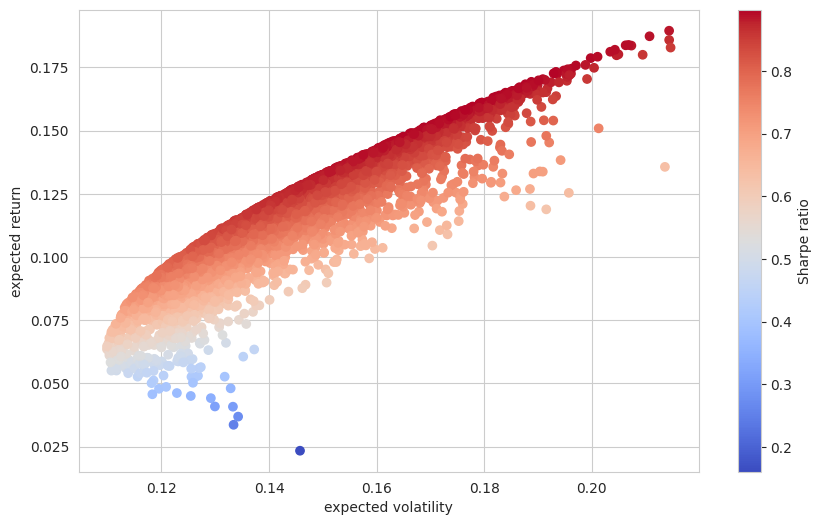

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')